In [801]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random
from sklearn.preprocessing import StandardScaler
from collections import Counter
import math #for inf

In [802]:
train_df = pd.read_csv('train_transform.csv')
train_df.set_index('PassengerId', inplace=True)
train_df.head(3)

,Survived,Pclass,Age,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,0.0,3,22.0,0,7.2500,1,0,1
2,1.0,1,38.0,0,71.2833,0,0,0
3,1.0,3,26.0,0,7.9250,0,0,1


# Логистическая регрессия

Это наша сигмоидная функция. Возвращает просто ее значение, ничего свыше

In [805]:
def sigmoid_function(z):
    return 1/(1 + np.exp(-z))

Далее идет функция, кооторая **предсказывает** наши значения. На вход она получает `матрицу Х`, которая содержит **закодированные признаки**, `вектор весов W` и `вектор b` - это веса W0. Затем с помощью `numpy.dot` считается **скалярное произведение** вектора на матрицу и прибавляется значение скаляра b. После эти значения передаются в **сигмоидную функцию**, а затем создается вектор `predictions`, который присваивает значение 1, если A_new больше или равно 0.5, и 0 - если меньше

In [807]:
def predict(X_pred, w, b):
    Z_new = np.dot(X_pred, w) + b
    A_new = sigmoid_function(Z_new)
    predictions = (A_new >= 0.5).astype(int)
    return predictions

Определяeм **матрицу признаков** и **матрицу ответов**, после чего определим гиперпараметры - `learning_rate` и `количество итераций`, инициализируем **вектор весов** и заполним его **нулями**, а так же скаляр, ему присвоим значение 0 (**скаляр** - это значение свободного члена в векторе весов `W0`, его задаем отдельно, иначе возникают сложности в реализации кода и так же сложность алгоритма **кратно возрастает**)

In [809]:
X = np.array(train_df[[col for col in train_df.columns if col != 'Survived']])
Y = np.array(train_df['Survived'])
learning_rate = 0.001
N_iterations = 10000

W = [0] * X.shape[1]
b = 0 #scalyar, w_0
n, m = X.shape[1], X.shape[0]

Запускаем **цикл**, который будет с помощью **градиентного спуска** будет вычислять веса W

In [811]:
accur = []
N = []
for i in tqdm(range(N_iterations)):
    Z = np.dot(X, W) + b
    A = sigmoid_function(Z)
    errors = A - Y

    grad_w0 = (1 / m) * np.sum(errors) 
    grad_w = (1 / m) * np.dot(X.T, errors)

    W = W - grad_w * learning_rate
    b = b - grad_w0 * learning_rate
    
    now_y = predict(X, W, b)
    accur.append(np.mean(now_y == Y))
    N.append(i)

100%|██████████████████████████████████| 10000/10000 [00:00<00:00, 24676.14it/s]


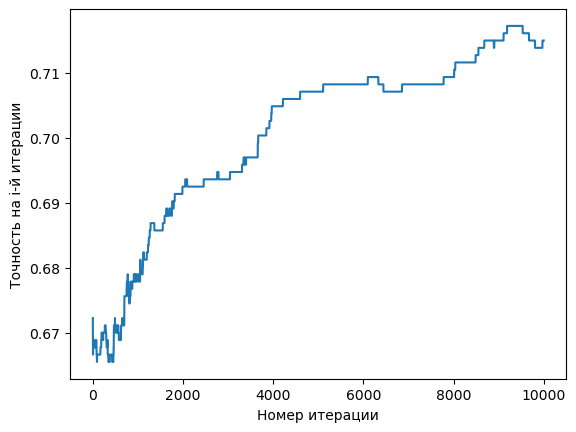

In [812]:
plt.plot(N, accur);
plt.xlabel('Номер итерации');
plt.ylabel('Точность на i-й итерации');

Делаем вывод, что чем больше итераций, тем больше наша точность. Так как на Титанике было около 60-65% выживших, а точность модели - выще 71%, значит она обучилась и может предсказывать некоторые значения. Стоит отметить, что для логистической регресси лучше стандартизировать данные, тогда ее точность должна будет стать выше. 

Следующим шагом стандартизируем данные и проделаем те же операции над данными. (Добавить по 2м признакам, график по линии - scatterplot). Выбрать 2 признак - пол и возраст и по ним уже построить график

In [814]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

W = [0] * X.shape[1]
b = 0 #scalyar, w_0

accur = []
N = []
for i in tqdm(range(20000)):
    Z = np.dot(X_scaled, W) + b
    A = sigmoid_function(Z)
    errors = A - Y

    grad_w0 = (1 / m) * np.sum(errors) 
    grad_w = (1 / m) * np.dot(X_scaled.T, errors)

    W = W - grad_w * learning_rate
    b = b - grad_w0 * learning_rate
    
    now_y = predict(X_scaled, W, b)
    accur.append(np.mean(now_y == Y))
    N.append(i)

100%|██████████████████████████████████| 20000/20000 [00:00<00:00, 24305.86it/s]


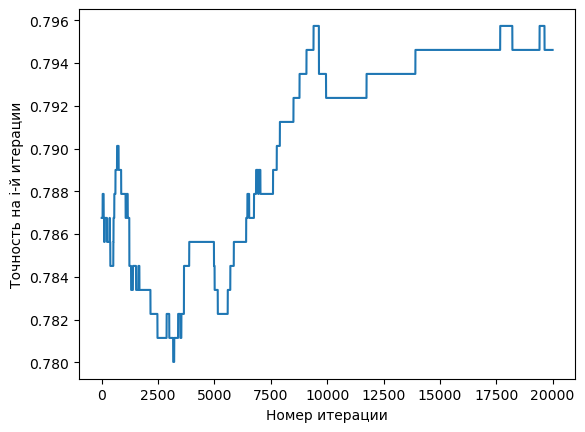

In [815]:
plt.plot(N, accur);
plt.xlabel('Номер итерации');
plt.ylabel('Точность на i-й итерации');

In [816]:
new_X = np.array(train_df[['Age', 'Sex_male']])
new_Y = Y
learning_rate = 0.001
N_iterations = 15000
new_W = [0] * new_X.shape[1]
skal_B = 0
n, m = new_X.shape[0], new_X.shape[1]

for i in range(N_iterations):
    Z = np.dot(new_X, new_W) + skal_B
    A = sigmoid_function(Z)
    errors = A - new_Y

    grad_w0 = (1 / n) * np.sum(errors)
    grad_w = (1 / n) * np.dot(new_X.T, errors)

    new_W = new_W - grad_w * learning_rate
    skal_B = skal_B - grad_w0 * learning_rate

Y_pred_for_two = predict(new_X, new_W, skal_B)

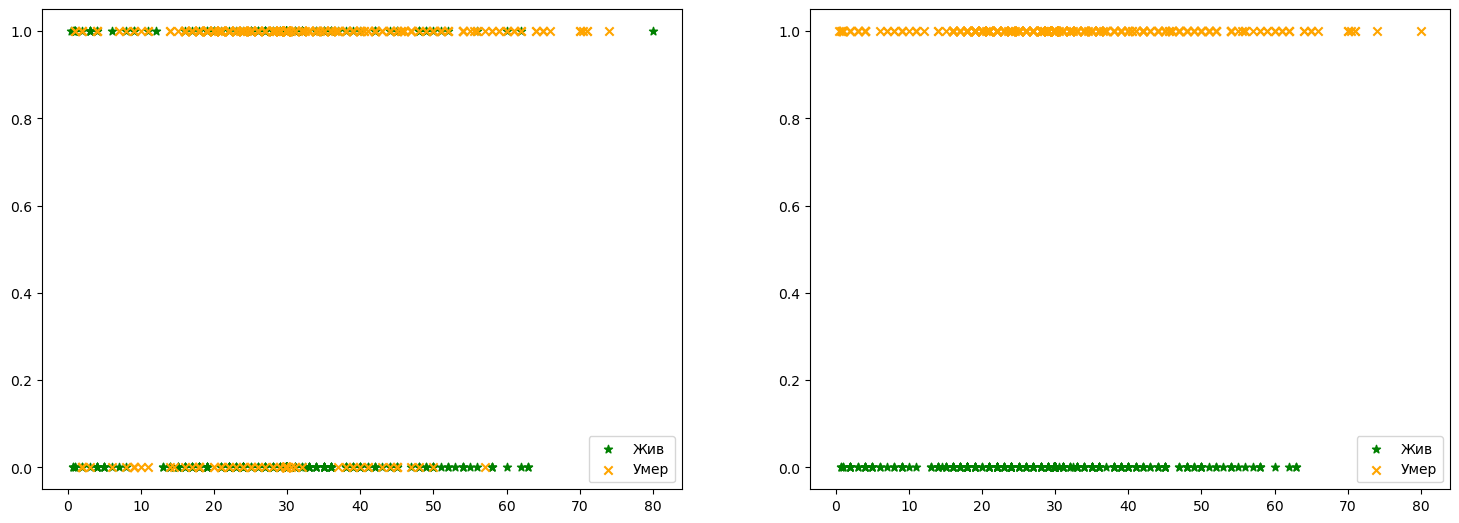

In [910]:
passed = new_Y == 1
failed = new_Y == 0

passed_pred = Y_pred_for_two == 1
failed_pred = Y_pred_for_two == 0

fig = plt.figure()
axes1 = fig.add_axes([0,0,1,1])
axes1.scatter(new_X[passed, 0], new_X[passed, 1], marker='*', color='green', label='Жив');
axes1.scatter(new_X[failed, 0], new_X[failed, 1], marker='x', color='orange', label='Умер');
axes1.legend();

axes2 = fig.add_axes([1.2, 0, 1, 1])
axes2.scatter(new_X[passed_pred, 0], new_X[passed_pred, 1], marker='*', color='green', label='Жив');
axes2.scatter(new_X[failed_pred, 0], new_X[failed_pred, 1], marker='x', color='orange', label='Умер');
axes2.legend();

*ПРЕДЫДУЩИЙ ГРАФИК НЕ ПОНИМАЮ, КАК ПОСТРОИТЬ ЧТО-ТО, ЧТО БУДЕТ ЧИТАЕМО*

Было еще **увеличено количество итераций** в 2 раза. Видим, что точность приближается к **80 процентам**, значит, после **стандартизации**, она выросла на **8 п.п.**, это довольно неплохой показатель

# Решающее дерево

Для начала пишем функцию, которая вычисляет `критерий Джини` - **чистоту ветвления**. У нас **бинарная классификация**, поэтому тут справедлива формула:
$$
Gini = 1 - p_0^2 - p_1^2, 
$$
где $p_o$ - это **доля** объектов, которые равны 0, а $p_1$ - **доля** объектов, равная 1

После вычислений функция возвращает нам **чистоту ветвления**

In [822]:
def gini_criterion(labels):
    if len(labels) == 0:
        return float(0)
    counts = Counter(labels)
    imp = 1
    for label in counts:
        count_of_label = counts[label]
        prob = count_of_label / len(labels)
        imp -= prob ** 2
    return imp

Функция `major` вычисляет **самый популярный** класс в ветвлении и возвращает его с помощью функции `most_common`. Так же обрабатывается случай, если у нас длина массива `labels` **равна 0** - просто возвращает значение `None`

In [824]:
def major(labels):
    if len(labels) == 0:
        return None
    counts = Counter(labels)
    return counts.most_common(1)[0][0]

Метод `split_data` разделяет **подмножество данных** на **левое и правое**. Принимает **текущий индекс** (индекс признака) - `now_index` и **порог** (меньше какого значения может быть признак) - `threshold`. Далее берет все объекты признака и **накладывает маску** - какие меньше или равны порогового значения - их в **левую маску**, остальные в **правую**. Возвращает подмножества X и У, на которые наложена маска, то есть они разделены на левое и правое подмножества.

In [826]:
def split_data(X_subset, Y_subset, now_index, threshold):
    left_mask = X_subset[:, now_index] <= threshold
    right_mask = ~left_mask

    X_left, Y_left = X_subset[left_mask], Y_subset[left_mask]
    X_right, Y_right = X_subset[right_mask], Y_subset[right_mask]

    return (X_left, Y_left), (X_right, Y_right)

`find_best_split` перебирает все **доступные признаки** (стобцы) - **внешний цикл**. После чего находит **возможное пороговое значение**, созданием массива из **уникальных значений** столбца. Далее перебирает эти значения - **внутренний цикл**: сначала разделяет на подмножества, потом находит чистоту по Джини и вычисляет **взвешенную чистоту Джини** - показывает, насколько хорошо **данное ветвление** разделит данные. Если взвешенное меньше лучшего - тогда всем параметрам присваиваются **текущие значения**. **Все параметры**: *индекс признака и пороговое значение*, их и возвращает данный метод

In [828]:
def find_best_split(X_subset, Y_subset):
    m_subset, n_f_subset = X_subset.shape
    if m_subset <= 1:
        return None, None

    now_gini = gini_criterion(Y_subset)
    best_gini_split = math.inf
    best_feature_index = None
    best_threshold = None

    for i in range(n_f_subset):
        thresholds = np.unique(X_subset[:, i])

        for threshold in thresholds:
            (X_left, Y_left), (X_right, Y_right) = split_data(X_subset, Y_subset, i, threshold)
            if len(Y_left) == 0 or len(Y_right) == 0:
                continue

            gini_left = gini_criterion(Y_left)
            gini_right = gini_criterion(Y_right)
            weighted_gini_split = (len(Y_left) / m_subset) * gini_left + (len(Y_right) / m_subset) * gini_right

            if weighted_gini_split < best_gini_split:
                best_gini_split = weighted_gini_split
                best_feature_index = i
                best_threshold = threshold

    if best_gini_split > now_gini:
        return None, None

    return best_feature_index, best_threshold

Метод `make_a_tree` строит **дерево** и **рекурсивно** вызывает сам себя. Находятся **текущее** значение признака и трешхолд. В начале проверяются **критерии останова**: макс. глубина, минимальное количество объектов, критерий джини, текущий индекс признака. Затем вызывается метод `split_data`, который **разбивает** данные на **левое и правое** подмножества. Далее рекурсивно вызывается **этот** метод, который строит левое и правое поддеревья. В конце функция возвращает **словарь** - где и как произошло данное ветвление при данном индексе и трешхолде.

In [830]:
def make_a_tree(X_subset, Y_subset, max_depth, min_objects, current_depth):
    f_index, threshold = find_best_split(X_subset, Y_subset)
    if current_depth >= max_depth:
        return {'type' : 'leaf', 'class' : major(Y_subset)}

    if len(Y_subset) < min_objects:
        return {'type' : 'leaf', 'class' : major(Y_subset)}

    if gini_criterion(Y_subset) == 0:
        return {'type' : 'leaf', 'class' : major(Y_subset)}

    if f_index is None:
        return {'type' : 'leaf', 'class' : major(Y_subset)}

    (X_left, Y_left), (X_right, Y_right) = split_data(X_subset, Y_subset, f_index, threshold)

    left_child = make_a_tree(X_left, Y_left, max_depth, min_objects, current_depth + 1)
    right_child = make_a_tree(X_right, Y_right, max_depth, min_objects, current_depth + 1)
    return {
        'type': 'internal',
        'feature_index': f_index,
        'threshold': threshold,
        'left_child': left_child,
        'right_child': right_child
    }

`predict_one` берет **один отдельный элемент** дерева и проводит его по всему дереву, чтобы определить **какой** класс предсказывает дерево. Так же является **рекурсивным методом**

In [832]:
def predict_one(tree_node, sample):
    if tree_node['type'] == 'leaf':
        return tree_node['class']

    f_index = tree_node['feature_index']
    threshold = tree_node['threshold']

    if sample[f_index] <= threshold:
        return predict_one(tree_node['left_child'], sample)
    else:
        return predict_one(tree_node['right_child'], sample)

`predict` **делает предсказания** по построенному дереву и по начальному набору данных `X`

In [834]:
def predictt(tree, X):
    predictions = []
    for sample in X:
        predictions.append(predict_one(tree, sample))
    return np.array(predictions)

Объявляем **гиперпараметры** нашей модели

In [836]:
m_samples = X.shape[0]
n_samples = X.shape[1]
max_depth = 15
min_objects = 5

Затем строим дерево, делаем предсказания и смотрим точность наших предсказаний

In [838]:
our_tree = make_a_tree(X, Y, max_depth, min_objects, 0)

Y_pred_train = predictt(our_tree, X)
accurancy = np.mean(Y_pred_train == Y)
print(f'Точность предсказаний на тренировочной выборке: {np.round(accurancy, 3) * 100}%')

Точность предсказаний на тренировочной выборке: 93.5%


Видим, что точность **существенно возрасла**, по сравнению с методом **логистической регрессии**. Если будем увеличивать глубину дела, то случится **переобучение**, поэтому высокая точность этого метода на тренировочном наборе данныъ - это еще не 100% успеха)

# Случайный лес

По сути, это то же самое, что и **решающее дерево**, но при этом мы используем будем использовать **ансамбль** из нескольких решающих деревьев. Всего будем строить **50 деревьев**. Этот метод помогает избежать **переобучения**, но при этом его практически **невозможно** интерпретировать

Алгоритм следующий:
1) Задаем **гиперпараметры**
2) Строим **лес**, используя цикл for. Делаем это выбирая рандомно признаки и объекты **с возвращением**
3) Делаем предсказания

Делаем адаптируем **функцию разбиения для ансамбля** - добавляем проверку на **максимальное** количество признаков (у нас их 7, дальнейшее изменение функций будет связано именно с **этой проверкой**)

In [846]:
def find_best_split_forest(X_subset, Y_subset, max_features):
    m_subset, n_f_subset = X_subset.shape
    if m_subset <= 1:
        return None, None

    now_gini = gini_criterion(Y_subset)
    best_gini_split = math.inf
    best_feature_index = None
    best_threshold = None

    num_features_to_consider = min(max_features, n_f_subset)
    if n_f_subset > 0 and num_features_to_consider > 0:
         features_to_try = random.sample(range(n_f_subset), num_features_to_consider)
    else:
         features_to_try = []

    for i in range(n_f_subset):
        thresholds = np.unique(X_subset[:, i])

        for threshold in thresholds:
            (X_left, Y_left), (X_right, Y_right) = split_data(X_subset, Y_subset, i, threshold)
            if len(Y_left) == 0 or len(Y_right) == 0:
                continue

            gini_left = gini_criterion(Y_left)
            gini_right = gini_criterion(Y_right)
            weighted_gini_split = (len(Y_left) / m_subset) * gini_left + (len(Y_right) / m_subset) * gini_right

            if weighted_gini_split < best_gini_split:
                best_gini_split = weighted_gini_split
                best_feature_index = i
                best_threshold = threshold

    if best_gini_split > now_gini:
        return None, None

    return best_feature_index, best_threshold

Теперь поменяем функцию `make_a_tree`, добавим во входные данные **максимальный** размер объектов, чтобы передать его в **функцию разбиения**

In [848]:
def make_the_tree(X_subset, Y_subset, max_depth, min_objects, max_features, current_depth):
    f_index, threshold = find_best_split_forest(X_subset, Y_subset, max_features)
    if current_depth >= max_depth:
        return {'type' : 'leaf', 'class' : major(Y_subset)}

    if len(Y_subset) < min_objects:
        return {'type' : 'leaf', 'class' : major(Y_subset)}

    if gini_criterion(Y_subset) == 0:
        return {'type' : 'leaf', 'class' : major(Y_subset)}

    if f_index is None:
        return {'type' : 'leaf', 'class' : major(Y_subset)}

    (X_left, Y_left), (X_right, Y_right) = split_data(X_subset, Y_subset, f_index, threshold)

    left_child = make_the_tree(X_left, Y_left, max_depth, min_objects, max_features, current_depth + 1)
    right_child = make_the_tree(X_right, Y_right, max_depth, min_objects, max_features, current_depth + 1)
    return {
        'type': 'internal',
        'feature_index': f_index,
        'threshold': threshold,
        'left_child': left_child,
        'right_child': right_child
    }

Функция `make_forest` - строит случайный лес из **50 деревьев**. Идет рандомная выборка объектов и признаков из начального набора данных, и соответственных ответов для них, затем для каждой выборки строится решающее дерево. Переменная `forest` - это список из словарей - решающих деревьев.

In [850]:
def make_forest(X, Y, n_estimators, max_depth, min_objects, max_features):
    forest = []
    m_samples = X.shape[0]
    for i in range(n_estimators):
        bootstrap_ind = np.random.choice(m_samples, size=m_samples, replace=True)
        X_sample, Y_sample = X[bootstrap_ind], Y[bootstrap_ind]
        
        now_tree = make_the_tree(X_sample, Y_sample, max_depth, min_objects, max_features, 0)
        forest.append(now_tree)
    return forest

Делаются предсказания по **каждому дереву**. Затем создается список **финальных предсказаний** - он получается каунтом едениц и нулей, если по сумме больше едениц - финальный ответ будет `1`, если нулей - `0` 

In [858]:
def predict_forest(forest, X):
    m_samples = X.shape[0]
    n_estimators = len(forest)

    all_predictions = np.zeros((m_samples, n_estimators), dtype=int)

    for i, tree in enumerate(forest):
        pred_for_tree = predictt(tree, X)
        all_predictions[:, i] = pred_for_tree

    final_predictions = np.zeros(m_samples, dtype=int)

    for j in range(m_samples):
        pred_for_one = all_predictions[j, :]

        count_ones = np.sum(pred_for_one)
        count_zeros = n_estimators - count_ones

        if count_ones > count_zeros:
            final_predictions[j] = 1
        else:
            final_predictions[j] = 0
            
    return final_predictions

Задаем **гиперпараметры** нашей модели

In [861]:
m_samples = X.shape[0]
n_features = X.shape[1]
n_estimators = 50
max_features = 4
max_depth = 15
min_objects = 5
random_forest = make_forest(X, Y, n_estimators, max_depth, min_objects, max_features)

Делаем **предсказания** и после считаем **точность**

In [864]:
Y_pred_forest = predict_forest(random_forest, X)
accurancy = np.mean(Y_pred_forest == Y)
print(f'Точность алгоритма "случайный лес" = {accurancy}')

Точность алгоритма "случайный лес" = 0.9595959595959596


Видим, что **точность** довольно высокая, при этом с **бОльшей** долей вероятности нам получится избежать **переобучения модели, так как строится не одно решающее дерево, а несколько сразу